#### CIE-Project B || Group - 7

#### Imports

In [10]:
import os
import csv
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn import preprocessing ##importing for normalization
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from keras.utils import np_utils

plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.frameon'] = True
%matplotlib widget

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

#### Get the root directory and change to it

In [2]:
rootdir = os.getcwd()
os.chdir(rootdir)

#### Variable Assignment

In [42]:
Training_Folder = 'EPOT_DATA'
Validation_Aug_Folder = 'Validation_augmented_data'
Experiment = 'Experiment'

#### Parse the training and validation augmented data

In [43]:
# Initialize lists for training and validation
training = []; training_labels = []
validation_aug = []; validation_aug_labels = [] # validation augmented data

#------------------------------------------------------------------------------

for subdir, dirs, files in os.walk(rootdir):
    
    if Training_Folder.lower() in subdir.lower():
        for file in files:
            if file.endswith('.mat'):
                lbl = [file.split('_')[1], file.split('_')[2][:3]]

                # load mat-file
                mat = loadmat(os.path.join(subdir, file))
                # get the numpy data from the mat file
                mat = mat['num_data']
                # append data to the list
                training.append(mat)
                training_labels.append(lbl)

    elif Validation_Aug_Folder.lower() in subdir.lower():
        for file in files:
            if file.endswith('.mat'):
                lbl = [file.split('_')[1], file.split('_')[2][:3]]

                # load mat-file
                mat = loadmat(os.path.join(subdir, file))
                # get the numpy data from the mat file
                mat = mat['num_data']
                # append data to the list
                validation_aug.append(mat)
                validation_aug_labels.append(lbl)

#### Parse the experimental data

In [49]:
# Initialize lists for training and validation
ex_data = []; ex_labels = []

#------------------------------------------------------------------------------

for subdir, dirs, files in os.walk(rootdir):
    
    if Experiment.lower() in subdir.lower():
        for file in files:
            if file.endswith('.txt'):
                
                line = []
                with open(os.path.join(subdir, file), 'r') as f:
                    x = pd.read_csv(os.path.join(subdir, file), delimiter='\t', decimal=',', skiprows=8, header=None)
                    x = np.asarray(x, dtype=float)
                    ex_data.append(x)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
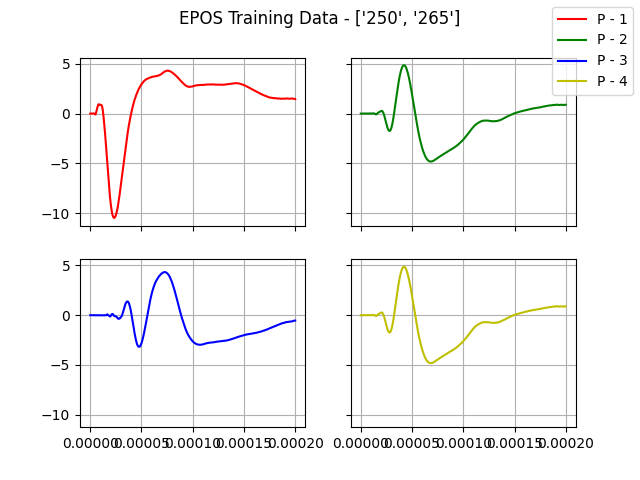

In [57]:
plt.close()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

l = 3

fig.suptitle(f'EPOS Training Data - {training_labels[l]}')

axs[0,0].plot(training[l][:,0], training[l][:,1], label='P - 1', c = 'r')
axs[0,1].plot(training[l][:,0], training[l][:,2], label='P - 2', c = 'g')
axs[1,0].plot(training[l][:,0], training[l][:,3], label='P - 3', c = 'b')
axs[1,1].plot(training[l][:,0], training[l][:,4], label='P - 4', c = 'y')

fig.legend()
plt.show()